# Nissen GCE Yield Set comparison

In [1]:
from compass import ModelTransfuser as MTf

import numpy as np
import pickle

In [2]:
mtf = MTf(path="data/Nissen_model_comp/")

In [3]:
# load model stats pickle file
with open("data/Nissen_model_comp/model_comp.pkl", "rb") as f:
    stats = pickle.load(f)

In [4]:
interesting_models = ["Nugrid_TNG_net_Seitenzahl", "TNG_net_TNG_net_Seitenzahl", "Karakas_net_yield_TNG_net_Seitenzahl", "Ventura_net_TNG_net_Seitenzahl", "Nugrid_chieffi04_Seitenzahl", "TNG_net_chieffi04_Seitenzahl"]

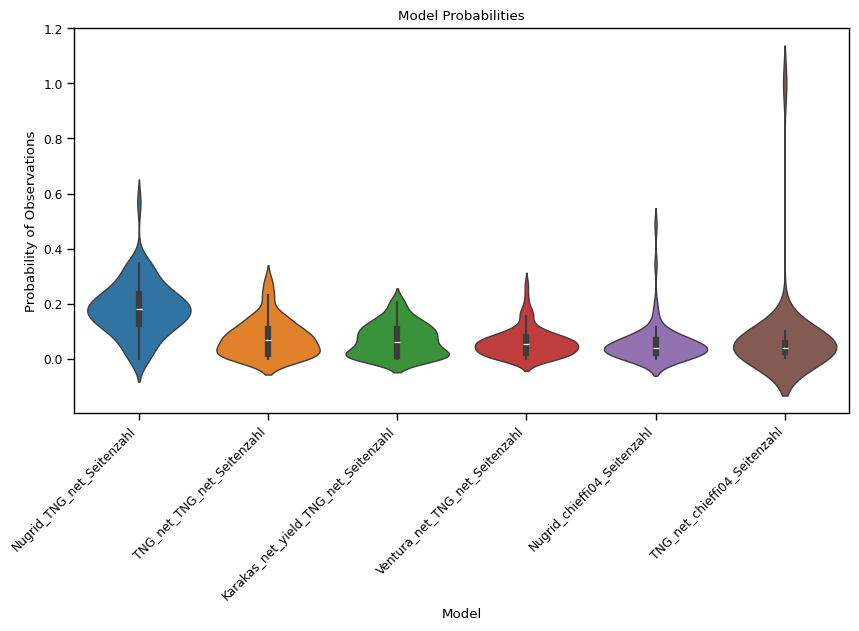

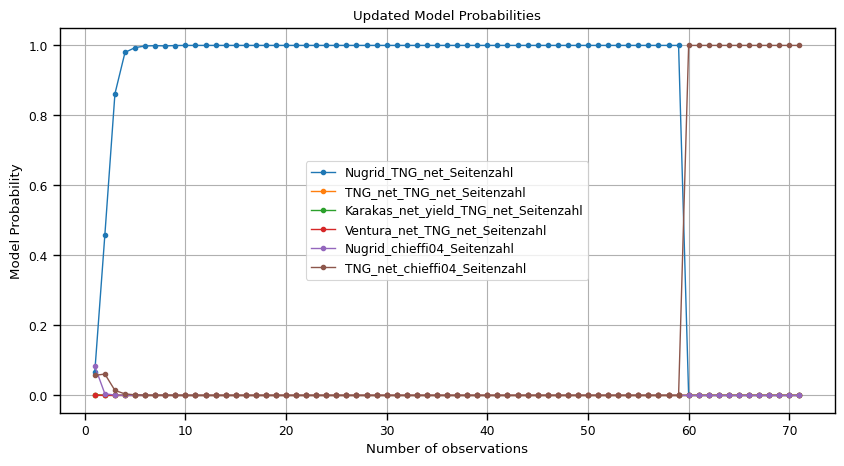

In [5]:
mtf.plots(stats_dict=stats, n_models=6, sort=interesting_models)

In [6]:
interesting_models = ["Nugrid_TNG_net_Seitenzahl", "TNG_net_TNG_net_Seitenzahl", "Karakas_net_yield_TNG_net_Seitenzahl", "Ventura_net_TNG_net_Seitenzahl", "Nugrid_chieffi04_Seitenzahl", "TNG_net_chieffi04_Seitenzahl"]

In [7]:
for m in interesting_models:
    
    mean = stats[m]["MAP"].mean(0)[0,:2]
    n = stats[m]["MAP"].shape[0]
    std_meas = np.sqrt(1/(1/stats[m]["MAP"][:,1,:2]).sum(0))
    std_mean = np.sqrt(1/(n-1)*((stats[m]["MAP"][:,0,:2]-mean)**2).sum(0)) / np.sqrt(n)
    std = np.sqrt(std_mean**2 + std_meas**2)

    print(f"Model: {m}")
    print(fr"IMF = {mean[0]:.2f} +- {std[0]:.2f}")
    print(fr"SFR = {mean[1]:.2f} +- {std[1]:.2f}")
    print()

Model: Nugrid_TNG_net_Seitenzahl
IMF = -2.52 +- 0.05
SFR = -2.92 +- 0.17

Model: TNG_net_TNG_net_Seitenzahl
IMF = -2.33 +- 0.10
SFR = -2.76 +- 0.08

Model: Karakas_net_yield_TNG_net_Seitenzahl
IMF = -2.47 +- 0.09
SFR = -2.88 +- 0.07

Model: Ventura_net_TNG_net_Seitenzahl
IMF = -2.45 +- 0.06
SFR = -2.93 +- 0.14

Model: Nugrid_chieffi04_Seitenzahl
IMF = -2.46 +- 0.06
SFR = -2.74 +- 0.06

Model: TNG_net_chieffi04_Seitenzahl
IMF = -2.46 +- 0.12
SFR = -3.09 +- 0.14



### Index 59 and 62 are massive outliers

In [8]:
stats_clean = stats.copy()

In [9]:
# remoeve index 59 and 62 from the stats dict
for m in list(stats.keys()):
    stats_clean[m]["MAP"] = np.delete(stats_clean[m]["MAP"], [59, 62], axis=0)
    stats_clean[m]["log_probs_nullHyp"] = np.delete(stats_clean[m]["log_probs_nullHyp"], [59, 62])
    stats_clean[m]["log_probs"] = np.delete(stats[m]["log_probs"], [59, 62])
    stats_clean[m]["AIC"] = stats_clean[m]["log_probs"].sum()
    stats_clean[m]["obs_probs"] = np.delete(stats_clean[m]["obs_probs"], [59, 62])

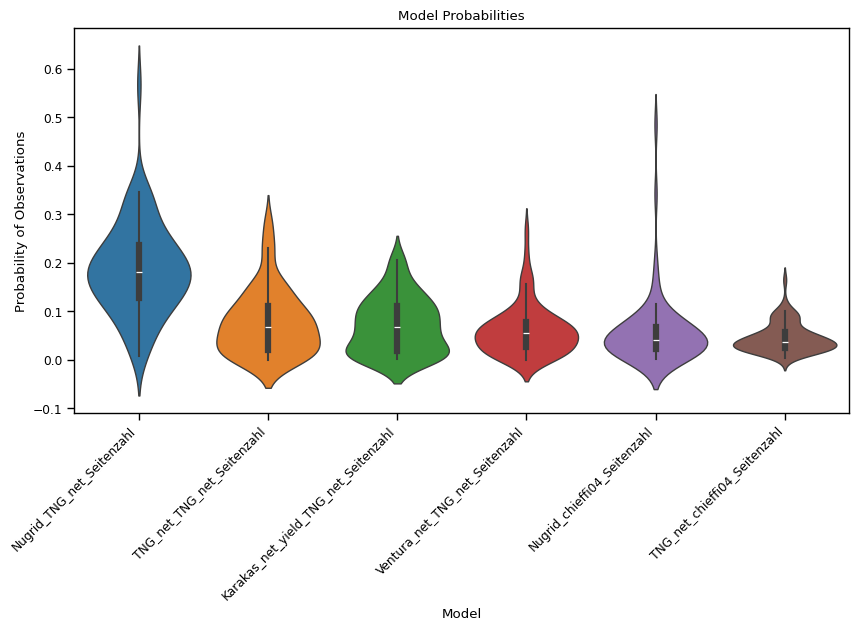

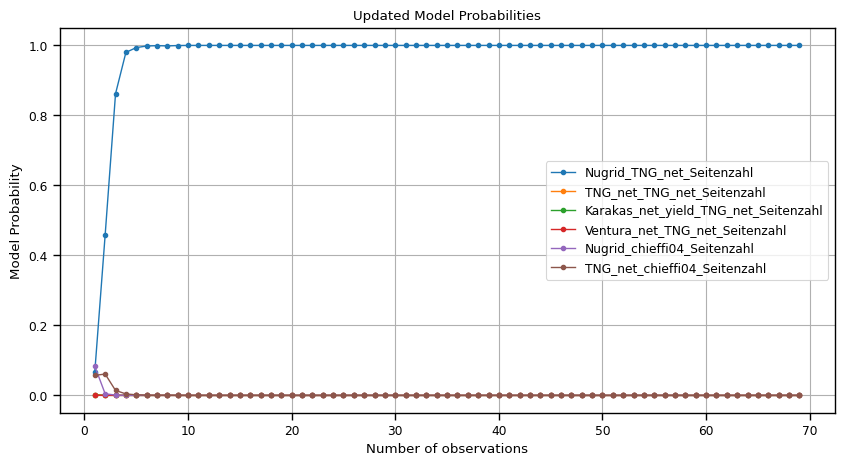

In [10]:
mtf.plots(stats_dict=stats_clean, n_models=6, sort=interesting_models)

In [11]:
interesting_models = ["Nugrid_TNG_net_Seitenzahl", "TNG_net_TNG_net_Seitenzahl", "Karakas_net_yield_TNG_net_Seitenzahl", "Ventura_net_TNG_net_Seitenzahl", "Nugrid_chieffi04_Seitenzahl", "TNG_net_chieffi04_Seitenzahl"]
for m in interesting_models:
    
    mean = stats_clean[m]["MAP"].mean(0)[0,:2]
    n = stats_clean[m]["MAP"].shape[0]
    std_meas = np.sqrt(1/(1/stats_clean[m]["MAP"][:,1,:2]).sum(0))
    std_mean = np.sqrt(1/(n-1)*((stats_clean[m]["MAP"][:,0,:2]-mean)**2).sum(0)) / np.sqrt(n)
    std = np.sqrt(std_mean**2 + std_meas**2)

    print(f"Model: {m}")
    print(fr"IMF = {mean[0]:.2f} +- {std[0]:.2f}")
    print(fr"SFR = {mean[1]:.2f} +- {std[1]:.2f}")
    print()

Model: Nugrid_TNG_net_Seitenzahl
IMF = -2.53 +- 0.05
SFR = -2.69 +- 0.05

Model: TNG_net_TNG_net_Seitenzahl
IMF = -2.44 +- 0.07
SFR = -2.73 +- 0.08

Model: Karakas_net_yield_TNG_net_Seitenzahl
IMF = -2.57 +- 0.05
SFR = -2.85 +- 0.07

Model: Ventura_net_TNG_net_Seitenzahl
IMF = -2.47 +- 0.06
SFR = -2.76 +- 0.07

Model: Nugrid_chieffi04_Seitenzahl
IMF = -2.52 +- 0.04
SFR = -2.68 +- 0.05

Model: TNG_net_chieffi04_Seitenzahl
IMF = -2.62 +- 0.04
SFR = -2.91 +- 0.05



## Error Probagation
We have the uncertainty of the single observation $\sigma_{i}$ and the uncertainty of the mean $\sigma_{\bar x}$. <br>
The uncertainty of the mean is given by:
$$
\sigma_{\bar x} = \frac1{\sqrt n} \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_{i} - \bar x)^{2}}
$$
where $\bar x$ is the mean of the $n$ observations. <br>

The measurement uncertainties are given by:
$$
\sigma_{meas} = \sqrt{\frac1{\sum_{i=1}^{n} 1/\sigma_{i}^{2}}}
$$
where $\sigma_{i}$ is the uncertainty of the $i$-th observation. <br> <br>

We can combine the two uncertainties using the following formula:
$$
\sigma_{total} = \sqrt{\sigma_{\bar x}^{2} + \sigma_{meas}^{2}}
$$
where $\sigma_{total}$ is the total uncertainty. <br>